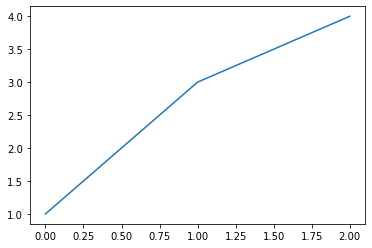

In [18]:
import matplotlib.pyplot as plt

plt.plot([1,3,4])

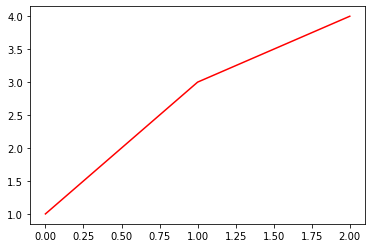

In [28]:
import matplotlib.pyplot as plt

plt.plot([1,3,4],"r")

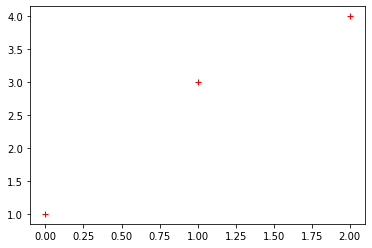

In [29]:
import matplotlib.pyplot as plt

plt.plot([1,3,4],"r+")

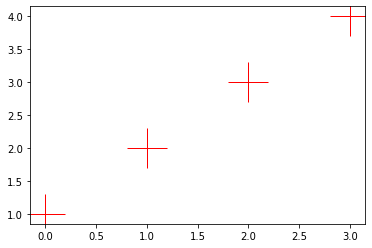

In [41]:
import matplotlib.pyplot as plt

plt.plot([1,2,3,4],"r+",markersize=40)

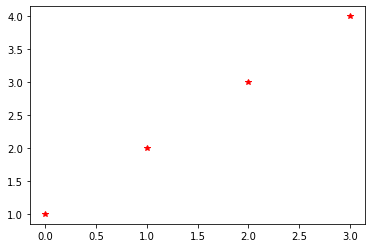

In [43]:
import matplotlib.pyplot as plt

plt.plot([1,2,3,4],"r*",linewidth=5)

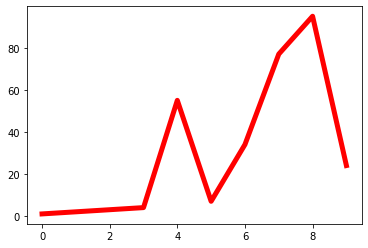

In [47]:
import matplotlib.pyplot as plt

plt.plot([1,2,3,4,55,7,34,77,95,24],"r",linewidth=5)

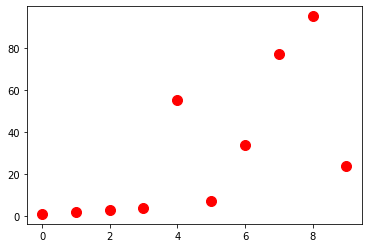

In [50]:
import matplotlib.pyplot as plt

plt.plot([1,2,3,4,55,7,34,77,95,24],"ro",markersize=10)

Text(0.5, 1.0, 'Graph')

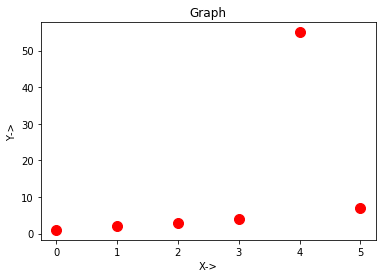

In [52]:
import matplotlib.pyplot as plt

plt.plot([1,2,3,4,55,7],"ro",markersize=10)

plt.xlabel("X->")
plt.ylabel("Y->")
plt.title("Graph")

(-0.25, 9)

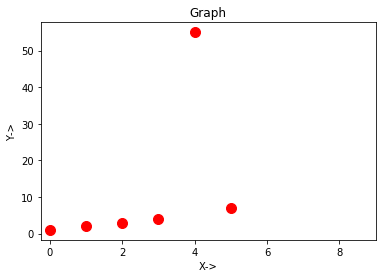

In [55]:
import matplotlib.pyplot as plt

plt.plot([1,2,3,4,55,7],"ro",markersize=10)

plt.xlabel("X->")
plt.ylabel("Y->")
plt.title("Graph")
plt.xlim(xmax=9)

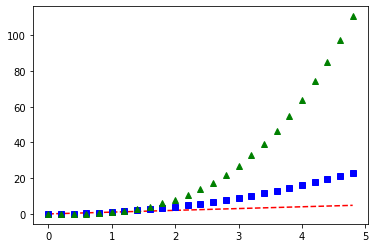

In [61]:
import numpy as np
import matplotlib.pyplot as plt

t=np.arange(0.,5.,0.2)
plt.plot(t,t,'r--',t,t**2,'bs',t,t**3,"g^")
plt.show()

# Scatter plt

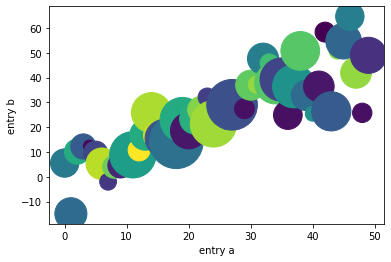

In [146]:
data = {
    'a' : np.arange(50),
    'c' : np.random.randint(0,50,50),
    'd' : np.random.randn(50)
}

data['b'] = data['a'] + 10*np.random.randn(50)
data['d'] = np.abs(data['d']) * 1000

plt.scatter('a','b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

# Vertical Plot

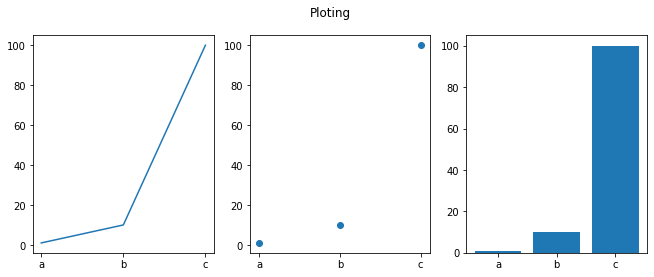

In [114]:
names = ["a","b","c"]
values = [1,10,100]

plt.figure(figsize=(11,4))

plt.subplot(133)##133->1 is row,3 is column, 3->position
plt.bar(names,values)

plt.subplot(132)
plt.scatter(names,values)

plt.subplot(131)
plt.plot(names,values)

plt.suptitle("Ploting")
plt.show()

# Horizontal Plot

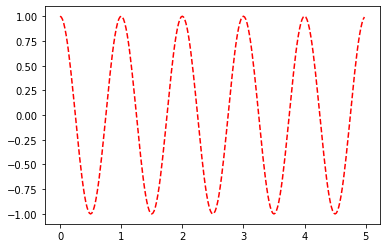

In [157]:
import matplotlib.pyplot as plt
import numpy as np
t2 = np.arange(0.0, 5.0, 0.02)

plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

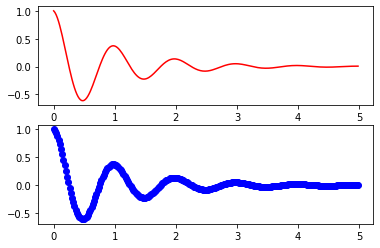

In [158]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)


t2 = np.arange(0.0, 5.0, 0.02)

plt.subplot(211)
plt.plot(t2, f(t2),'r-')
plt.subplot(212)
plt.plot(t2, f(t2),'bo')

plt.show()

# HISTOGRAM

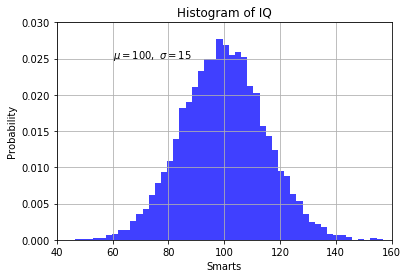

In [163]:
mu,sigma = 100,15
x = mu + sigma * np.random.randn(10000)

n,bins, pitches = plt.hist(x,50,density=2, facecolor='b', alpha=0.75)

plt.xlabel("Smarts")
plt.ylabel("Probability")
plt.title("Histogram of IQ")
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40,160,0, 0.03])
plt.grid(True)
plt.show()

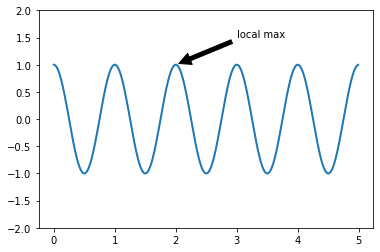

In [175]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line = plt.plot(t,s, lw=2)

plt.annotate('local max', xy=(2,1), xytext=(3,1.5), arrowprops = dict(facecolor="black", shrink=0.05))

plt.ylim(-2,2)
plt.show()

Iron Man 7.9
The Incredible Hulk 6.7
Iron Man 2 7.0
Thor 7.0
Captain America: The First Avenger 6.9
Marvel's The Avengers has no rating
Iron Man 3 7.2
Thor: The Dark World 6.9
Captain America: The Winter Soldier 7.7
Guardians of the Galaxy 8.0
Avengers: Age of Ultron 7.3
Ant-Man 7.3
Captain America: Civil War 7.8
Doctor Strange 7.5
Guardians of the Galaxy Vol. 2 7.6
Spider-Man: Homecoming 7.4
Thor: Ragnarok 7.9
Black Panther 7.3
Avengers: Infinity War 8.5
Ant-Man and the Wasp 7.1
Captain Marvel 6.9
Avengers: Endgame 8.5
Spider-Man: Far From Home 7.6
                                 movies rating
0                              Iron Man    7.9
1                   The Incredible Hulk    6.7
2                            Iron Man 2    7.0
3                                  Thor    7.0
4    Captain America: The First Avenger    6.9
5                            Iron Man 3    7.2
6                  Thor: The Dark World    6.9
7   Captain America: The Winter Soldier    7.7
8               Guard

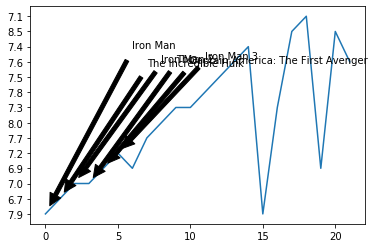

In [198]:
import requests as rq
from bs4 import BeautifulSoup
import pandas as pd


temp_data=[]
res = rq.get("https://en.wikipedia.org/wiki/List_of_Marvel_Cinematic_Universe_films")                                                  
soup = BeautifulSoup(res.text, 'html.parser') 
table = soup.find("table",class_="wikitable plainrowheaders")
with open("marvel.txt","w+") as file:
    for items in table.find_all("tr"):
        data = [' '.join(item.text.split()) for item in items.find_all(['th','td'])]
        if len(data)>2:
             temp_data.append(data[0])


movies = []
rating = []
for items in temp_data[1:]:
    omid_api = rq.get("http://www.omdbapi.com/?i=tt3896198&apikey=7815f87e&t="+items)
    json = omid_api.json()
    try:
        print(items, json['imdbRating'])
        movies.append(items)
        rating.append(json['imdbRating'])
    except:
        print(items,"has no rating")


df = pd.DataFrame({'movies' : movies, 'rating' : rating})
print(df)
for index, item in enumerate(rating[:6]):
    
    plt.annotate(movies[index], xy=(index,item), xytext=(index+6, float(item)+3), arrowprops = dict(facecolor="black", shrink=0.05))
    
plt.plot(rating)
